Data & Preprocessing

The dataset of this study is found in the following link:
https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv

cette Data contient plusieurs fichier csv

Lister les fichiers disponibles :

In [66]:
# importation des librairie
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Lister les fichiers disponibles :
files = glob.glob("DATA/*.csv")  # le chemin VERS LES FICHIERS CSV
print(f"Nombre de fichiers CSV trouvés: {len(files)}\n")

for f in files:
    print(f"{os.path.basename(f)} -> {os.path.getsize(f)/1024:.1f} KB")

Nombre de fichiers CSV trouvés: 10

02-14-2018.csv -> 349827.5 KB
02-15-2018.csv -> 367134.7 KB
02-16-2018.csv -> 325902.0 KB
02-20-2018.csv -> 3959888.0 KB
02-21-2018.csv -> 321185.2 KB
02-22-2018.csv -> 373668.2 KB
02-23-2018.csv -> 373867.6 KB
02-28-2018.csv -> 204345.5 KB
03-01-2018.csv -> 105315.3 KB
03-02-2018.csv -> 344109.7 KB


In [3]:
# Charger un échantillon de chaque fichier
for f in files:
    print(f"\n===== {os.path.basename(f)} =====")
    df = pd.read_csv(f, nrows=5)  # lire juste 5 lignes
    print("Colonnes :", list(df.columns))
    print(df.head())


===== 02-14-2018.csv =====
Colonnes : ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd P

In [4]:
df = pd.read_csv(files[0], low_memory=False)
print("\nTypes de colonnes :")
print(df.dtypes)

print("\nValeurs manquantes (%):")
print(df.isna().mean().round(2)*100)

print("\nAperçu des valeurs uniques (si peu nombreuses):")
for col in df.columns:
    if df[col].nunique() < 20:
        print(f"\n{col}: {df[col].unique()}")



Types de colonnes :
Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object

Valeurs manquantes (%):
Dst Port         0.0
Protocol         0.0
Timestamp        0.0
Flow Duration    0.0
Tot Fwd Pkts     0.0
                ... 
Idle Mean        0.0
Idle Std         0.0
Idle Max         0.0
Idle Min         0.0
Label            0.0
Length: 80, dtype: float64

Aperçu des valeurs uniques (si peu nombreuses):

Protocol: [ 0  6 17]

Fwd PSH Flags: [0 1]

Bwd PSH Flags: [0]

Fwd URG Flags: [0]

Bwd URG Flags: [0]

FIN Flag Cnt: [0 1]

SYN Flag Cnt: [0 1]

RST Flag Cnt: [0 1]

PSH Flag Cnt: [0 1]

ACK Flag Cnt: [0 1]

URG Flag Cnt: [0 1]

CWE Flag Count: [0]

ECE Flag Cnt: [0 1]

Fwd Byts/b Avg: [0]

Fwd Pkts/b Avg: [0]

Fwd Blk Rate Avg: [0]

Bwd Byts

In [4]:
len(files)

10

In [6]:
df = files[0]

In [8]:
print(f"\n===== {os.path.basename(df)} =====")
print(df['Label'].unique())


===== 02-14-2018.csv =====


TypeError: string indices must be integers, not 'str'

In [ ]:
for f in files:
    print(f"\n===== {os.path.basename(f)} =====")
    df = pd.read_csv(f)  
    print(df['Label'].unique())


===== 02-14-2018.csv =====
['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']

===== 02-15-2018.csv =====
['Benign' 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris']

===== 02-16-2018.csv =====


C:\Users\AYOUB\AppData\Local\Temp\ipykernel_8104\4289257741.py:3: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


['Benign' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk' 'Label']

===== 02-20-2018.csv =====


*******************************************************************************

le fichier 02-14-2018.csv est contient en label ['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']
alors en travail sur Ce fichier 

In [31]:
df = pd.read_csv("DATA/02-14-2018.csv")
print(df.shape)
print(df['Label'].value_counts())
df.head()

(1048575, 80)
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


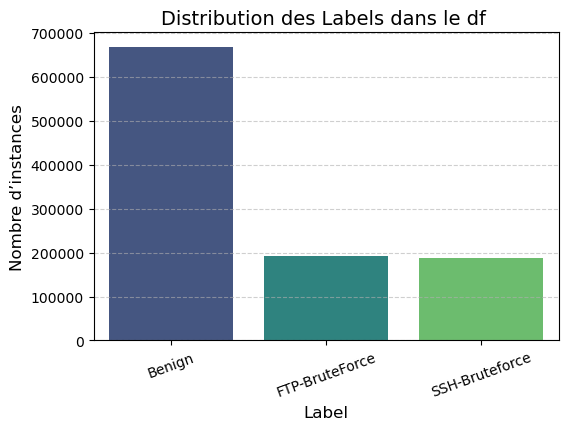

In [6]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Label', palette='viridis')

plt.title('Distribution des Labels dans le df ', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Nombre d’instances', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Filtrer les labels pertinents pour seulement ['Benign', 'SSH-Bruteforce']

In [32]:
df = df[df['Label'].isin(['Benign', 'SSH-Bruteforce'])]

reafficher le nombre total d’instances et la répartition des labels

In [33]:
print(df.shape)
print(df['Label'].value_counts())

(855215, 80)
Label
Benign            667626
SSH-Bruteforce    187589
Name: count, dtype: int64


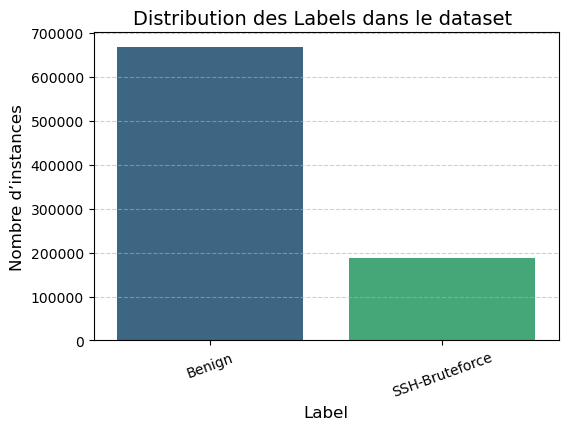

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Label', palette='viridis')

plt.title('Distribution des Labels dans le dataset ', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Nombre d’instances', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


les pourcentages

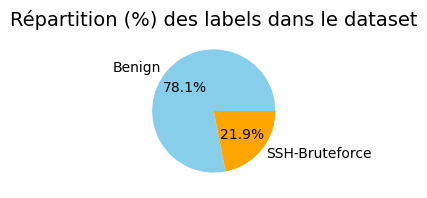

In [35]:
label_counts = df['Label'].value_counts(normalize=True) * 100
label_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4,2), colors=['skyblue','orange','red'])
plt.title("Répartition (%) des labels dans le dataset", fontsize=14)
plt.ylabel('')
plt.show()


In [36]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [37]:
print(f"The dataset is made up of {len(df)} instances")

The dataset is made up of 855215 instances


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855215 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           855215 non-null  int64  
 1   Protocol           855215 non-null  int64  
 2   Timestamp          855215 non-null  object 
 3   Flow Duration      855215 non-null  int64  
 4   Tot Fwd Pkts       855215 non-null  int64  
 5   Tot Bwd Pkts       855215 non-null  int64  
 6   TotLen Fwd Pkts    855215 non-null  int64  
 7   TotLen Bwd Pkts    855215 non-null  int64  
 8   Fwd Pkt Len Max    855215 non-null  int64  
 9   Fwd Pkt Len Min    855215 non-null  int64  
 10  Fwd Pkt Len Mean   855215 non-null  float64
 11  Fwd Pkt Len Std    855215 non-null  float64
 12  Bwd Pkt Len Max    855215 non-null  int64  
 13  Bwd Pkt Len Min    855215 non-null  int64  
 14  Bwd Pkt Len Mean   855215 non-null  float64
 15  Bwd Pkt Len Std    855215 non-null  float64
 16  Flow B

Supprimer les colonnes inutiles

In [41]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

Drop the 'Timestamp' and 'Dst Port' columns, because it doesn't bring any relavant clues to find the class label

In [42]:
df = df.drop(columns=["Timestamp"])

In [45]:
df=df.drop(columns=["Protocol"])

Data Cleaning


Vérifier et gérer les valeurs manquantes

In [46]:
df.isnull().sum()

Dst Port           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Label              0
Length: 78, dtype: int64

In [47]:
print(df.isnull().sum().sum())  # nombre total de valeurs manquantes

2271


Null values present only in the 'Flow Byts/s' column

In [50]:
df.columns.to_series()[df.isna().any()]


Flow Byts/s    Flow Byts/s
dtype: object

Supprime toutes les lignes qui contiennent au moins une valeur manquante

In [51]:
df = df.dropna()

In [52]:
print(df.isnull().sum().sum())  # nombre total de valeurs manquantes

0


Vérifier et corriger les valeurs aberrantes

garder des données réalistes.

In [59]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()


Dropping duplicates

In [53]:
print(f"Number of duplicates is: {df.duplicated().sum().sum()}")

Number of duplicates is: 180391


In [54]:
df = df.drop_duplicates()

Our dataset dropped from 855215 to 671085 rows after data cleaning

In [61]:
print(df.shape)
print(df['Label'].value_counts())

(671085, 78)
Label
Benign            577037
SSH-Bruteforce     94048
Name: count, dtype: int64


Encodage du label (target encoding)

transformer les labels en format numérique pour le modèle ML.

In [62]:
df['Label'] = df['Label'].map({'Benign': 0, 'SSH-Bruteforce': 1})


Encodage des variables catégorielles

# Rééquilibrage des classes

Sous-échantillonnage de la classe majoritaire (Under-sampling

On réduit le nombre de lignes de la classe majoritaire (Benign) pour qu’elle soit proche de la classe minoritaire (SSH-Bruteforce).

In [74]:
from sklearn.utils import resample

# Séparer les classes
df_majority = df[df.Label == 0]  # Benign
df_minority = df[df.Label == 1]  # SSH-Bruteforce

# Rééchantillonner la classe majoritaire pour qu’elle ait le même nombre que la minoritaire
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # ne pas réutiliser les lignes
                                   n_samples=len(df_minority),  
                                   random_state=42)

# Recombiner
df_balanced = pd.concat([df_majority_downsampled, df_minority])


In [75]:
df_balanced

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
578457,443,3355421,9,20,1349,6039,485,0,149.888889,206.210720,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
925540,80,117554237,19,18,1313,2118,434,0,69.105263,162.334324,...,20,279595.363636,610492.012691,2120298,95438,1.000939e+07,14072.215929,10013732,9966960,0
457065,51021,29942361,2,0,0,0,0,0,0.000000,0.000000,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
667064,49946,19,1,1,0,0,0,0,0.000000,0.000000,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
994453,53,1156,1,1,49,77,49,49,49.000000,0.000000,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376214,22,258,2,1,0,0,0,0,0.000000,0.000000,...,32,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1
379530,22,73,2,1,0,0,0,0,0.000000,0.000000,...,32,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1
380529,22,68,2,1,0,0,0,0,0.000000,0.000000,...,32,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1
381518,21,47,1,1,0,0,0,0,0.000000,0.000000,...,40,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1


#  Séparer features et target


In [76]:
X_bal = df_balanced.drop('Label', axis=1)
y_bal = df_balanced['Label']

#  Normalisation / Standardisation

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)

In [78]:
X_scaled

array([[-0.28087554, -0.17975267, -0.12224936, ..., -0.05826626,
        -0.20679809, -0.20053111],
       [-0.30757494,  4.34161723,  0.0912152 , ..., -0.04744959,
         0.82008622,  0.85989688],
       [ 3.43924123,  0.87287987, -0.27167454, ..., -0.05826626,
        -0.20679809, -0.20053111],
       ...,
       [-0.31184097, -0.31259812, -0.27167454, ..., -0.05826626,
        -0.20679809, -0.20053111],
       [-0.31191452, -0.31259895, -0.293021  , ..., -0.05826626,
        -0.20679809, -0.20053111],
       [-0.31184097, -0.31259483, -0.27167454, ..., -0.05826626,
        -0.20679809, -0.20053111]])

# Feature Selection

Feature selection was done using 'SelectKBest' from sklearn which selects the K best features according to some scoring function.
The scoring function used for 'SelectKBest' is 'f_classif' which computes the ANOVA F-values for the provided samples

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif

# Séparer features et labels
X = df_balanced.drop('Label', axis=1)
y = df_balanced['Label']

# Choisir les K meilleures features (ex: K=30)
k = 20
selector = SelectKBest(score_func=f_classif, k=k)

# Appliquer la sélection
X_selected = selector.fit_transform(X, y)

# Pour savoir quelles features ont été sélectionnées
selected_features = X.columns[selector.get_support()]
print("Top {} features:\n".format(k), selected_features)


C:\Users\AYOUB\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [31 32 33 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\AYOUB\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 20 features:
 Index(['Dst Port', 'Flow Duration', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'Flow IAT Max', 'Fwd IAT Tot',
       'Pkt Len Min', 'Pkt Len Max', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')


# Dataset after feature selection

In [81]:
# Dataset final avec top features + label
df_final = pd.DataFrame(X_selected, columns=selected_features)
df_final['Label'] = y.values

# Visualiser un échantillon
print(df_final.head())


   Dst Port  Flow Duration  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0     443.0      3355421.0            485.0              0.0   
1      80.0    117554237.0            434.0              0.0   
2   51021.0     29942361.0              0.0              0.0   
3   49946.0           19.0              0.0              0.0   
4      53.0         1156.0             49.0             49.0   

   Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
0        149.888889       206.210720           1460.0              0.0   
1         69.105263       162.334324            706.0              0.0   
2          0.000000         0.000000              0.0              0.0   
3          0.000000         0.000000              0.0              0.0   
4         49.000000         0.000000             77.0             77.0   

   Bwd Pkt Len Std  Flow IAT Max  ...  Pkt Len Min  Pkt Len Max  PSH Flag Cnt  \
0       538.379388     2857295.0  ...          0.0       1460.0           1.0   
1       

In [82]:
import os

# Nom du dossier de sortie
out_dir = "data_final"

# Sauvegarder en CSV
df_final.to_csv(os.path.join(out_dir, "ssh_dataset_final.csv"), index=False)

print("Dataset sauvegardé dans :", out_dir)


Dataset sauvegardé dans : data_final
